<a href="https://colab.research.google.com/github/M-Salim-I/Other-Projects/blob/main/Activation_functions_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from random import uniform
import matplotlib.pyplot as plt

Code adapted and inspired from: 

*   https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/
*   https://www.kaggle.com/asimislam/tutorial-python-subplots



In [2]:
class ACTIVATION_FUNCTIONS:
  def __init__(self, dataset):
    ''':param dataset_numpy_array: numpy array of 1-dimensional points'''
    self.dataset = dataset
  
  def heaviside(self):
    out = []
    for x in self.dataset:
      if x <= 0:
        out.append(0)
      else:
        out.append(1)
    return np.array(out)
  
  def threshold(self, threshold, value):
    out = []
    for x in self.dataset:
      if x > threshold:
        out.append(x)
      else:
        out.append(value)
    return np.array(out)

  def linear(self, alpha = 1):
    return alpha * self.dataset
  
  def hard_shrink(self, alpha = 0.5):
    out = []
    for x in self.dataset:
      if x > alpha or x < -alpha:
        out.append(x)
      else:
        out.append(0)
    return np.array(out)
  
  def soft_shrink(self, alpha = 0.5):
    out = []
    for x in self.dataset:
      if x > alpha:
        out.append(x - alpha)
      elif x < -alpha:
        out.append(x + alpha)
      else:
        out.append(0)
    return np.array(out)

  def relu(self):
    out = []
    for x in self.dataset:
      out.append(max(x, 0))
    return np.array(out)

  def leaky_relu(self):
    out = []
    for x in self.dataset:
      out.append(max(x, 1e-2 * x))
    return np.array(out)

  def p_relu(self, alpha): 
    out = []
    for x in self.dataset:
      out.append(max(x, alpha * x))
    return np.array(out)
  
  def relu6(self):
    out = []
    for x in self.dataset:
      out.append(min(max(0, x), 6))
    return np.array(out)

  def elu(self, alpha):
    out = []
    for x in self.dataset:
      out.append(max(0, x) + min(0, alpha * (np.exp(x) - 1)))
    return np.array(out)
  
  def selu(self):
    out = []
    for x in self.dataset:
      out.append(1.0507009873554804934193349852946 * (max(0, x) + 
                                                      min(0, 1.6732632423543772848170429916717 * (np.exp(x) - 1))))
    return np.array(out)
  
  def celu(self, alpha = 1):
    out = []
    for x in self.dataset:
      out.append(max(0, x) + min(0, alpha * (np.exp(x / a) - 1)))
    return np.array(out)
  
  def rrelu(self, lower = 1 / 8, upper = 1 / 3):
    out = []
    alpha = uniform(lower, upper)
    for x in self.dataset:
      if x >= 0:
        out.append(x)
      else:
        out.append(alpha * x)
    return np.array(out)

  def softplus(self, alpha = 1):
    return (1 / alpha) * np.log(1 + np.exp(alpha * self.dataset))

  def sigmoid(self):
    return 1 / (1 + np.exp(-1 * self.dataset))
  
  def hard_sigmoid(self):
    out = []
    for x in self.dataset:
      if x <= -3:
        out.append(0)
      elif x >= 3:
        out.append(1)
      else:
        out.append((x / 6) + 0.5)
    return np.array(out)
  
  def log_sigmoid(self):
    return np.log(self.sigmoid())
  
  def silu(self):
    return self.dataset * self.log_sigmoid()
  
  def soft_sign(self):
    return self.dataset / (1 + np.abs(self.dataset))
  
  def tanh(self):
    return 2 * self.sigmoid() - 1
  
  def hard_tanh(self, min_val = -1, max_val = 1):
    out = []
    for x in self.dataset:
      if x > max_val:
        out.append(max_val)
      elif x < min_val:
        out.append(min_val)
      else:
        out.append(x)
    return np.array(out)
  
  def tanh_shrink(self):
    return self.dataset - self.tanh()
  
  def swish(self):
    return self.dataset * self.sigmoid()
  
  def hard_swish(self):
    out = []
    for x in self.dataset:
      if x <= -3:
        out.append(0)
      elif x >= 3:
        out.append(x)
      else:
        out.append(x * ((x + 3) / 6))
    return np.array(out)

  def softmax(self):
    return np.exp(self.dataset) / np.sum(np.exp(self.dataset))
  
  def softmin(self):
    return np.exp(-self.dataset) / np.sum(np.exp(-self.dataset))
  
  def log_softmax(self):
    return np.log(self.softmax())

In [3]:
arr = np.linspace(-10, 10, num = 100)
AF = ACTIVATION_FUNCTIONS(arr)

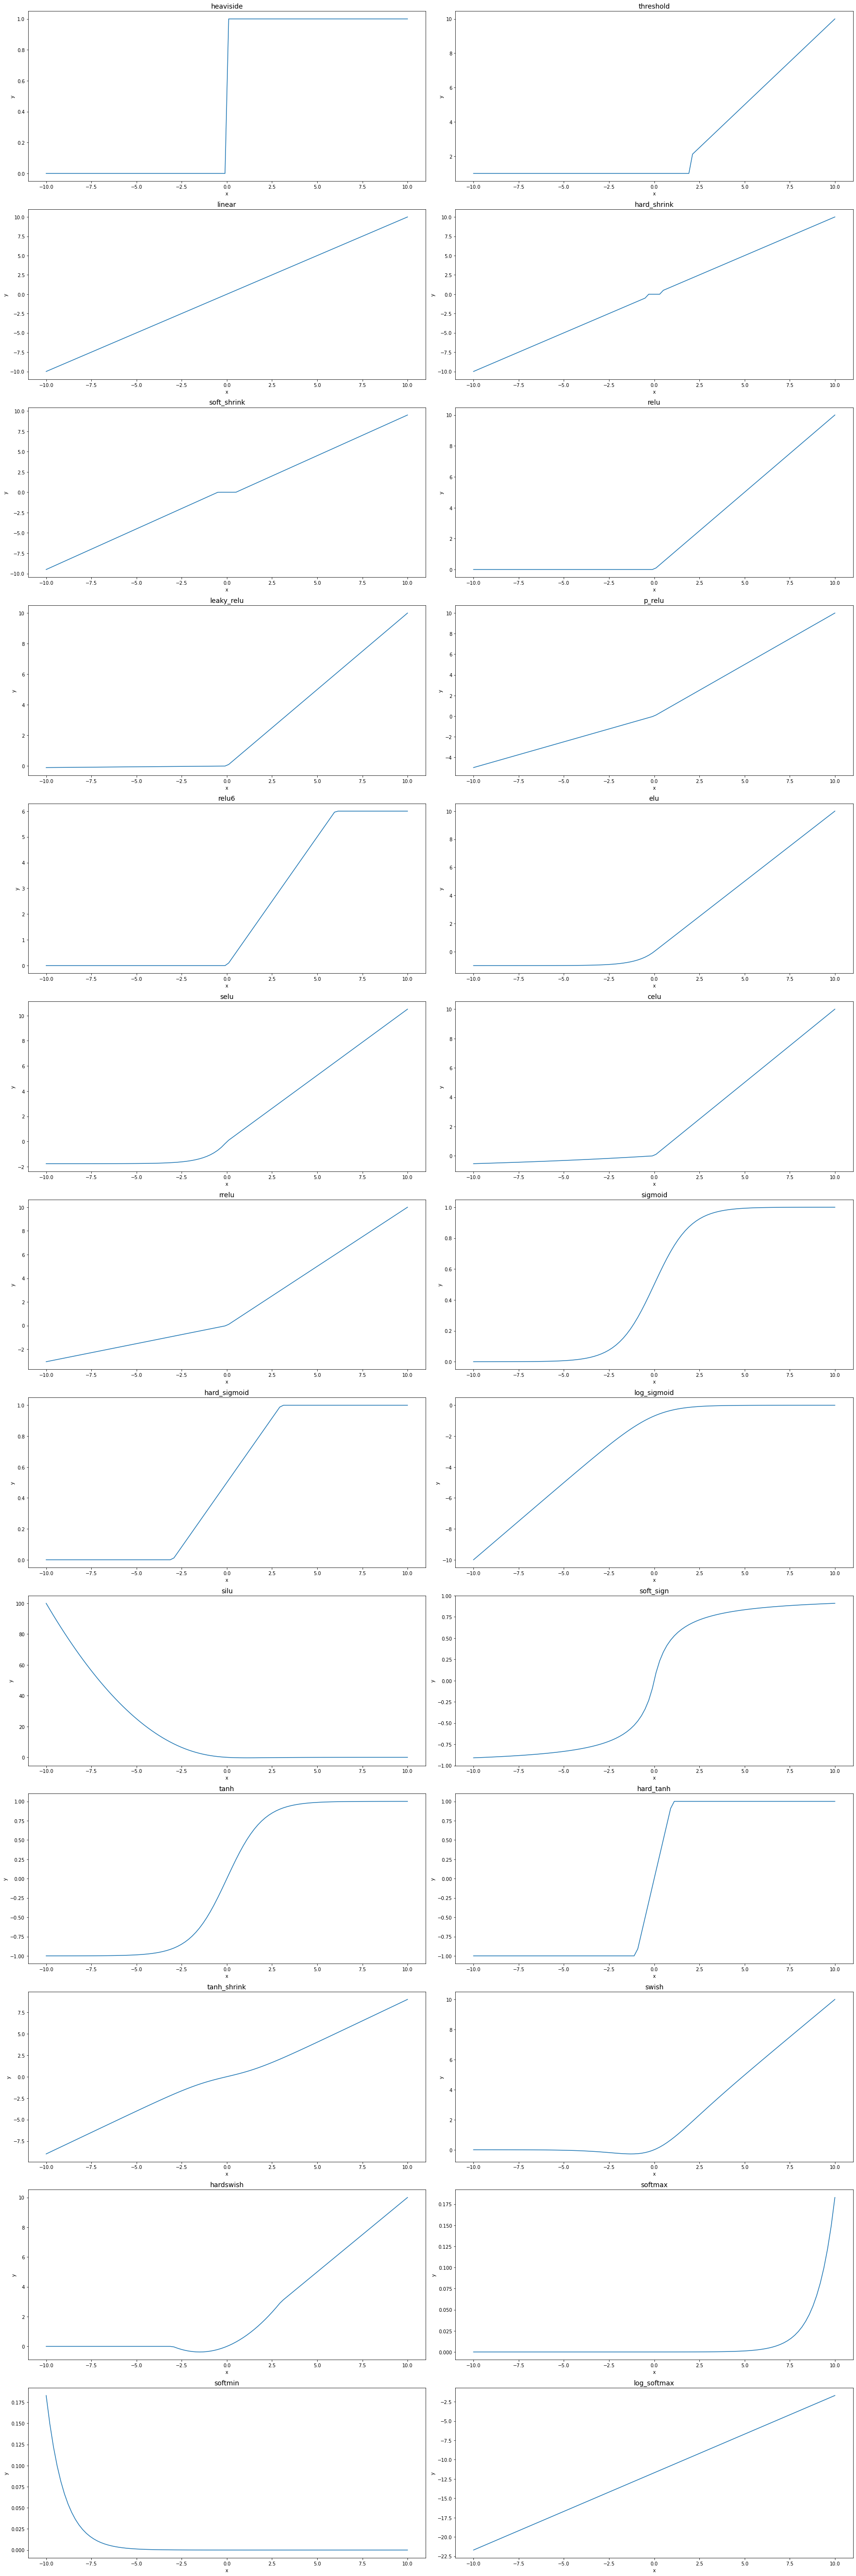

In [4]:
a = 13  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

funcs = [
  lambda: AF.heaviside(),
  lambda: AF.threshold(threshold = 2,  value = 1),
  lambda: AF.linear(), lambda: AF.hard_shrink(), lambda: AF.soft_shrink(),
  lambda: AF.relu(), lambda: AF.leaky_relu(), lambda: AF.p_relu(alpha = 0.5), lambda: AF.relu6(), 
  lambda: AF.elu(alpha = 1), lambda: AF.selu(), lambda: AF.celu(), lambda: AF.rrelu(),
  lambda: AF.sigmoid(), lambda: AF.hard_sigmoid(), lambda: AF.log_sigmoid(), lambda: AF.silu(), lambda: AF.soft_sign(),
  lambda: AF.tanh(), lambda: AF.hard_tanh(), lambda: AF.tanh_shrink(),
  lambda: AF.swish(), lambda: AF.hard_swish(),
  lambda: AF.softmax(), lambda: AF.softmin(), lambda: AF.log_softmax()
]

names = [
         'heaviside',
         'threshold',
         'linear', 'hard_shrink', 'soft_shrink',
         'relu', 'leaky_relu', 'p_relu', 'relu6', 'elu', 'selu', 'celu', 'rrelu',
         'sigmoid', 'hard_sigmoid', 'log_sigmoid', 'silu', 'soft_sign',
         'tanh', 'hard_tanh', 'tanh_shrink',
         'swish', 'hardswish', 
         'softmax', 'softmin', 'log_softmax'
]

fig = plt.figure(figsize = (25, 75))

for name, func in zip(names, funcs):
    plt.subplot(a, b, c)
    plt.title(f'{name}', fontsize = 14)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(arr, func())
    c +=  1
plt.tight_layout()
plt.show()